# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Histograms showing the number of images for each of the class labels

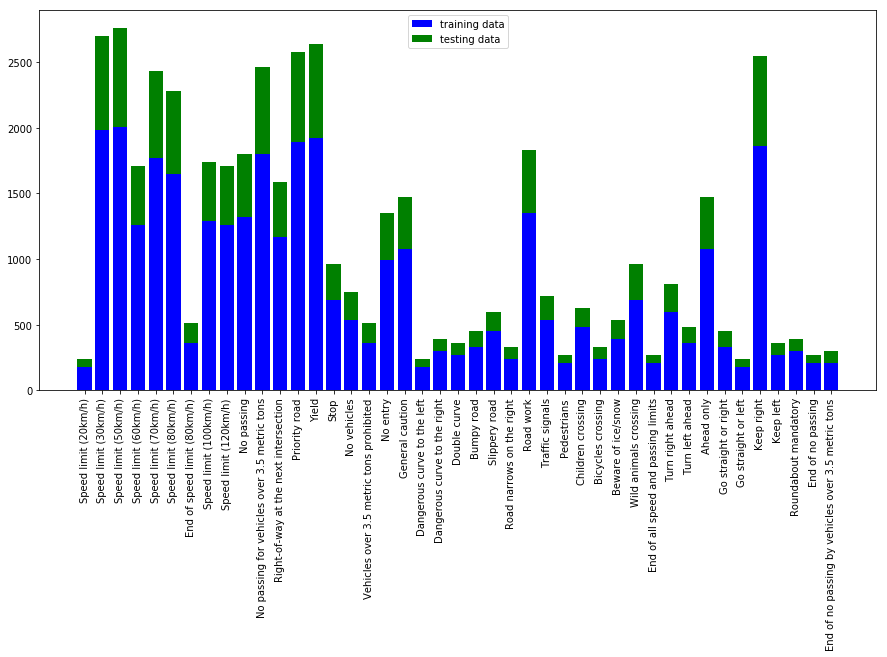

In [37]:

import matplotlib.pyplot as plt
import csv
%matplotlib inline

# read csv for sign names
sign_names = []
with open('signnames.csv') as signname_file:
    signname_file_reader = csv.DictReader(signname_file)
    sign_names = [row['SignName'] for row in signname_file_reader]

x_axs = range(n_classes)
# If we want to include the validation set as part of the training set do:
# train_classes_count = [np.count_nonzero(np.append(y_train , y_valid) == x) for x in range(n_classes)]

train_classes_count = [np.count_nonzero(y_train == x) for x in range(n_classes)]
test_classes_count = [np.count_nonzero(y_test == x) for x in range(n_classes)]

plt.figure(figsize=(15,7))

plt.bar(x_axs, train_classes_count, color = 'b',  align='center' , label='training data')
plt.bar(x_axs, test_classes_count, color = 'g',  bottom = train_classes_count, label='testing data')
plt.xticks(x_axs, sign_names, rotation='vertical')
plt.legend(loc='upper center')
plt.show()

In [12]:
y_train.shape

(34799,)

In [13]:
y_valid.shape

(4410,)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<function matplotlib.pyplot.show>

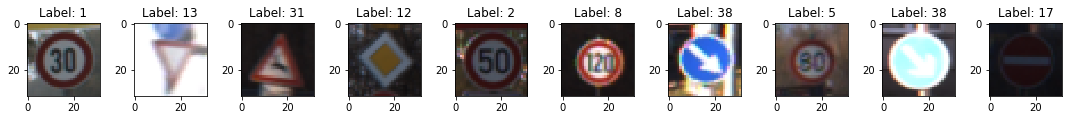

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Showing 10 random  traffic sign images and their corresponding image label
num_sample = 10

# Choose a random image from the training set
idx = np.random.randint(0, n_train, num_sample)
images = X_train[idx].squeeze()   # squeeze: Remove single-dimensional entries from the shape of an array.
labels = y_train[idx]

(h, w) = image_shape
center = (w / 2, h / 2)

    
# showing the images
plt.rcParams["figure.figsize"] = [15, 5]

for i, image in enumerate(images):
    plt.subplot(1, num_sample, i+1)
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])

plt.tight_layout()
plt.show


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [4]:
### Pre-process the Data Set (normalization, grayscale, etc.)

### Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np
from sklearn.utils import shuffle

    
M_ccw = cv2.getRotationMatrix2D(center, 15, 1.0)
M_cw = cv2.getRotationMatrix2D(center, -15, 1.0)

X_train_augm_ccw = np.array([cv2.warpAffine(image, M_ccw, (w, h)) for image in X_train]) 
X_train_augm_cw = np.array([cv2.warpAffine(image, M_cw, (w, h)) for image in X_train])
X_train = np.vstack((X_train, X_train_augm_ccw, X_train_augm_cw))  

#for i in range(n_train):
#    X_train = np.vstack((X_train,[cv2.warpAffine(X_train[i], M_ccw, (w, h))]))

y_train = np.hstack((y_train, y_train, y_train))    
    
X_train, y_train = shuffle(X_train, y_train) 



In [5]:

def preprocess(images):
    images = (images / 255.) - 0.5
    return images

def unpreprocess(images):
    images = np.uint8(images * 255. + 255. / 2.)
    return images

In [6]:
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

In [7]:
n_train = X_train.shape[0]

print("Number of training examples after data augmentation =", n_train)


Number of training examples after data augmentation = 104397


### Model Architecture:
### a. Setup TensorFlow

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

### b.  Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels which are 3 in our case. 

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x18.

**Activation.** ReLu activation function.

**Pooling.** The output shape should be 14x14x18.

**Layer 2: Convolutional.** The output shape should be 10x10x48.

**Activation.** ReLu activation function.

**Pooling.** The output shape should be 5x5x48.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported. This will yield 1200x1 outputs.

**Layer 3: Fully Connected.** This should have 360 outputs.

**Activation.** ReLu activation function.

**Layer 4: Fully Connected.** This should have 172 outputs.

**Activation.** ReLu activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # dropout = 0.9  # Dropout, probability to keep units
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x18.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 18), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(18))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # conv1    = tf.nn.dropout(conv1, dropout)
    
    # SOLUTION: Pooling. Input = 28x28x18. Output = 14x14x18.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x18. Output = 10x10x48.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # conv2    = tf.nn.dropout(conv2, dropout)
    
    # SOLUTION: Pooling. Input = 10x10x48. Output = 5x5x48.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x48. Output = 1200.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1200. Output = 360.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 360), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(360))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and Dropout
    fc1    = tf.nn.relu(fc1)
    # fc1    = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 360. Output = 172.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(360,172), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(172))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and Dropout
    fc2    = tf.nn.relu(fc2)
    # fc2    = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 172. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(172, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### c. Features and Labels
Train LeNet to classify Traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model:
### a. Training Pipeline


A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# The rate at the 1st 20 epochs = 0.01 , from epoch 20 to 80 the rate = 0.001 
# from epoch 80 to 100 the rate = 0.0001
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### b. Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [12]:
inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data

### c. Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [13]:
accuracy_history =[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # if i%10 == 0:
            # rate = rate/10
            # optimizer = tf.train.AdamOptimizer(learning_rate = rate)
            # print("Setting the RATE to {} ...".format(rate))
            
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy, training_loss, _ = evaluate(X_train, y_train) 
        validation_accuracy, validation_loss, inference_data  = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} , Validation Accuracy = {:.3f}".format(training_accuracy, validation_accuracy))
        print("Training Loss = {:.3f} , Validation Loss = {:.3f}".format(training_loss, validation_loss))
        print()
        accuracy_history.append((training_accuracy,validation_accuracy))
        
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    # Save accuracy_history to accuracy_history.p
    with open('accuracy_history.p', 'wb') as f:
                pickle.dump(accuracy_history, f)
            
    print("Accuracy history saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.961 , Validation Accuracy = 0.883
Training Loss = 0.142 , Validation Loss = 0.430

EPOCH 2 ...
Training Accuracy = 0.984 , Validation Accuracy = 0.906
Training Loss = 0.063 , Validation Loss = 0.428

EPOCH 3 ...
Training Accuracy = 0.990 , Validation Accuracy = 0.923
Training Loss = 0.036 , Validation Loss = 0.300

EPOCH 4 ...
Training Accuracy = 0.989 , Validation Accuracy = 0.909
Training Loss = 0.038 , Validation Loss = 0.346

EPOCH 5 ...
Training Accuracy = 0.994 , Validation Accuracy = 0.918
Training Loss = 0.030 , Validation Loss = 0.317

EPOCH 6 ...
Training Accuracy = 0.996 , Validation Accuracy = 0.938
Training Loss = 0.011 , Validation Loss = 0.332

EPOCH 7 ...
Training Accuracy = 0.997 , Validation Accuracy = 0.928
Training Loss = 0.010 , Validation Loss = 0.364

EPOCH 8 ...
Training Accuracy = 0.997 , Validation Accuracy = 0.925
Training Loss = 0.012 , Validation Loss = 0.464

EPOCH 9 ...
Training Accuracy = 0.994 , Validation 

<function matplotlib.pyplot.show>

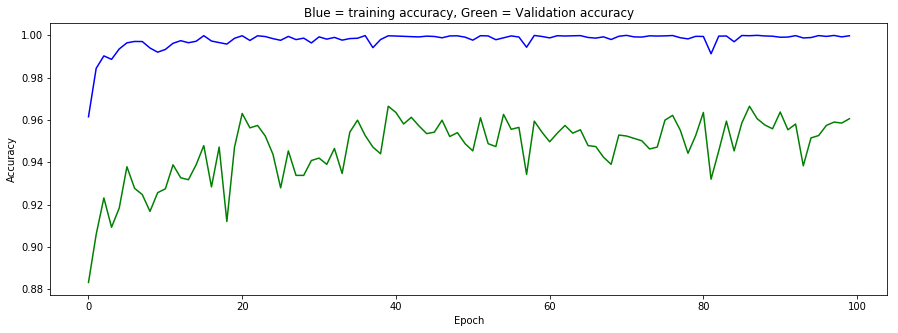

In [14]:
# Plotting Training and Validation accuracy
accuracies = np.transpose(np.array(accuracy_history))
plt.plot(accuracies[0], 'b') # training accuracy in blue
plt.plot(accuracies[1], 'g') # validation accuracy in green
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Blue = training accuracy, Green = Validation accuracy')
plt.show





Test Accuracy = 0.947, Test Loss = 1.779


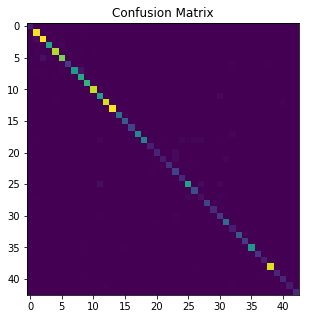

In [15]:
# Evaluate the Test set
from sklearn.metrics import confusion_matrix

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy, test_loss, inference_data = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}, Test Loss = {:.3f}".format(test_accuracy, test_loss))
    
    
    plt.title('Confusion Matrix')
    plt.imshow(confusion_matrix(y_true = y_test,y_pred = inference_data))



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images and Predict the Sign Type for Each Image

Testing 5 new images...
Inferred classes: [17 12  9 19 13]


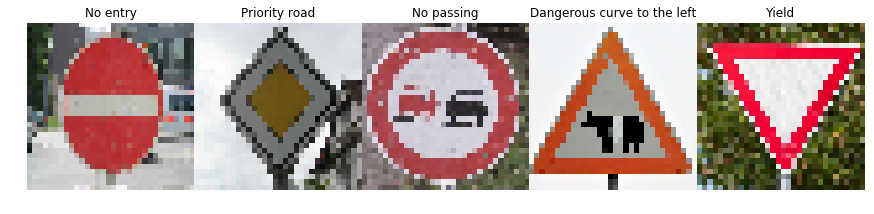

In [16]:
import matplotlib.image as mpimg

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Plot and preprocess the new images to be tested
list_of_new_images = ['GTS0.png', 'GTS1.png', 'GTS2.png', 'GTS3.png', 'GTS4.png' ]
new_images = np.array([cv2.cvtColor(cv2.resize(cv2.imread(image),
                                               (32,32), interpolation = cv2.INTER_CUBIC), 
                                    cv2.COLOR_BGR2RGB) for image in list_of_new_images])
   

#preprocess (normalize range of colors)
new_images_preprocessed = preprocess(new_images)


with tf.Session() as sess:
    print("Testing {} new images...".format(len(new_images)))
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
        
    
    # Run inference on CNN to make predictions, and remember the logits for later
    
    ## lgts = sess.run(logits, feed_dict={x: new_images_preprocessed})
    inference = sess.run( inference_operation, feed_dict={x: new_images_preprocessed})
    
    print("Inferred classes:", inference)

 

count = len(new_images)
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
    
for i in range(0, count):
    image = new_images[i]
    evaluated = inference[i]

    axs[i].axis('off')
    axs[i].set_title(sign_names[evaluated])
    axs[i].imshow(image)


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Analysis: The accuracy of the prediction for the above 5 new images is 80%. The 4th image is not available in the German traffic signs set which we used in this project. And to be fair, the predected sign (Dangerous curve to the left) is probably one of the most similar sign or even maybe the most similar sign to this unfamiliar sign to the network.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    print(sess.run( tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: new_images_preprocessed}))
    top_k_vals, top_k_idxs = sess.run( tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: new_images_preprocessed})
    
def display_pred_certainty(image, top_k_val, top_k_idx):
    print('Top 5 predictions for the following image (prediction: probability)')
    # Convert top k indices into strings
    top_k_pred = [sign_names[idx] for idx in top_k_idx]
    
    
    plt.imshow(image)
    plt.show()
    
    for i in range(5):
        print('%s: %.2f%%' % (top_k_pred[i].replace('\n', ''), top_k_val[i] * 100)) 


TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.22923447e-35,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.19494109e-16,   5.12743414e-30,
          1.35069012e-33,   3.80915707e-34],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[17,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [ 9, 41,  0,  1,  2],
       [19, 35,  9, 25, 36],
       [13,  0,  1,  2,  3]], dtype=int32))


Top 5 predictions for the following image (prediction: probability)


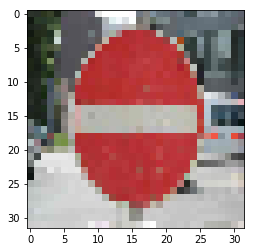

No entry: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%


In [27]:
i = 0
display_pred_certainty(new_images[i], top_k_vals[i], top_k_idxs[i])



Top 5 predictions for the following image (prediction: probability)


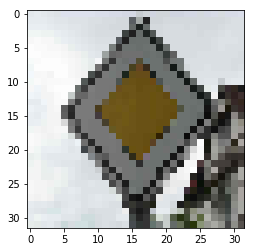

Priority road: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%


In [28]:
i = 1
display_pred_certainty(new_images[i], top_k_vals[i], top_k_idxs[i])




Top 5 predictions for the following image (prediction: probability)


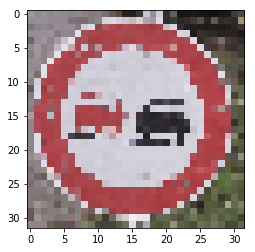

No passing: 100.00%
End of no passing: 0.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%


In [29]:
i = 2
display_pred_certainty(new_images[i], top_k_vals[i], top_k_idxs[i])



Top 5 predictions for the following image (prediction: probability)


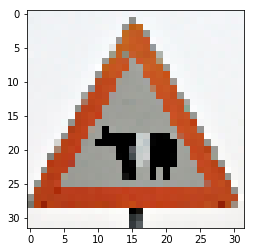

Dangerous curve to the left: 100.00%
Ahead only: 0.00%
No passing: 0.00%
Road work: 0.00%
Go straight or right: 0.00%


In [30]:
i = 3
display_pred_certainty(new_images[i], top_k_vals[i], top_k_idxs[i])



Top 5 predictions for the following image (prediction: probability)


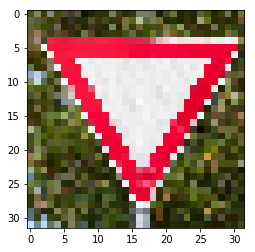

Yield: 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (60km/h): 0.00%


In [31]:
i = 4
display_pred_certainty(new_images[i], top_k_vals[i], top_k_idxs[i])



---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [61]:
# Note: x should be the same name as your network's tensorflow data placeholder variable
# If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
# which is exactly what happened here!
outputFeatureMap(new_images_preprocessed[0], conv1_W )

NameError: name 'conv1_W' is not defined

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** Please refer to the project writeup for details about this question.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 